# Web Search 2018 - Tutorial 3: High-level semantic embeddings
## Contents

1. [Overview](#head1)
  1. [Code Imports](#head11)
  2. [Initial setup](#head12)
2. [Image Categorization](#head2)
  1. [Loading an image annotation pre-trained model](#head21)
  2. [Loading and pre-processing images](#head22)
  3. [Categorizing images with ImageNet concepts](#head23)
  4. [Visualizing classification results](#head24)
  5. [Image/Text Search in Tags BoW space](#head25)
3. [Text Named Entity Extraction](#head3)
  1. [Corpus](#head31)
  2. [Named-Entities Extraction](#head32)
4. [Image High-level semantic embeddings](#head4)
5. [Exercises](#head5)


## <a name="head1"></a> Overview


The goal of this lab is to perfom image/text categorization using state-of-the-art methods and experiment/investigate high-level semantic embedding spaces. 
Images and Text search over these vector spaces will be studied.

**Lab objectives:**
* Perform Image categorization using state-of-the-art models;
* Understand how can images be represented in high-level embedding semantic spaces;
* Understand conceptually how are these embedding spaces created/obtained;
* Categorize individual words/n-grams of text documents with Named Entity Recognition;
* Perform Image and Text search based on high-level spaces. Understand the properties of each high-level space, and contrast with the search spaces covered in the last lab;
* Contrast search in BoW vs continous high-level search spaces.

### <a name="head11"></a>  Importing some of the required modules and the Web Search code toolkit:

In [1]:
import os
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

# Hide all warnings
import warnings
warnings.filterwarnings('ignore')

print (os.getcwd(), "changing to:", os.getcwd()+"/../")

# Change this according to the path where you have the ws_toolkit
ws_toolkit_path = os.getcwd()+"/.."

os.chdir(ws_toolkit_path)
print (os.getcwd())

from ws_toolkit.utils import center_crop_image

/home/david/repos/websearch2018/labs changing to: /home/david/repos/websearch2018/labs/../
/home/david/repos/websearch2018


### <a name="head12"></a> Setup a small image database for this lab:

In [23]:
image1="cars.jpg"
image2="lena.jpg"
image3="street.jpg"
image4="bird.jpg"
image5="cup.jpg"
image6="red.jpg"
image7="strawberries.jpg"
image8="ferrari.jpg"
image9="bird2.jpg"
image10="street2.jpg"
image11="car2.jpg"
image12="fat_bird.jpg"
image13="flowers.jpg"
image14="flowers2.jpg"
image15="red2.jpg"

# Images database
images = [image1, image2, image3, image4, image5, image6, image7, image8, image9, image10, image15]

# <a name="head2"></a> Image Categorization

We will start by categorizing images based on the semantic concepts that each image depict.

CNNs have achieved top performance in a large variety of machine learning tasks. Namely, CNNs have consistently achieved top-performance in the ImageNET Large Scale Visual Recognition Challenge since 2012. The goal of this challenge is to develop a system that can classify unseen images within a set of semantic concepts (1000 concepts). The list of the 1000 ImageNet concepts is available [here](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).

In this lab we will use the ResNet [1] network, proposed by researchers of the Microsoft Research team. This network won the ImageNet challenge in 2015.

**A model pre-trained on ImageNet will be used to classify images, with a semantic vocabulary of 1000 concepts.**


[1] [He, Kaiming, Xiangyu Zhang, Shaoqing Ren and Jian Sun. “Deep Residual Learning for Image Recognition.” 2016 IEEE Conference on Computer Vision and Pattern Recognition (CVPR) (2016): 770-778](https://arxiv.org/abs/1512.03385)


### <a name="head21"></a> Loading ResNet-50 CNN model from Keras

In [24]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

# Load the ResNet-50 model and load the pre-trained weights
model = ResNet50(weights='imagenet')

### <a name="head22"></a> Loading and pre-processing images using Keras

In [4]:
# Notice the operations that are being applied to the loaded image. 
img_list = []
for img in images:
    
    # We are loading each image using Keras image and specifying the target size.
    img = image.load_img("labs/data/" + img, target_size=(224, 224))
    
    # Then the function img_to_array converts a PIL (library used by Keras) to a numpy array
    x = image.img_to_array(img)
    
    # A one dimension is added to the the numpy array (224x224x3) becomes (1x224x224x3)
    x = np.expand_dims(x, axis=0)
    
    # Apply Keras pre-processing steps specific to ResNet-50 model
    # Check the function here for ResNet-50:
    # def preprocess_input(x):
    #     x /= 255.
    #     x -= 0.5
    #     x *= 2.
    #     return x
    x = preprocess_input(x)
    
    img_list.append(x)
                         
# Convert from list to ndarray
img_array_list = np.vstack(img_list)

### <a name="head23"></a> Categorize images

We've loaded both the images and the pre-trained CNN model. Now let's classify images within the set of the 1000 ImageNet concepts.

Usually, for the multiclass setting, the last layer of a classification neural network is a **softmax layer\***, which defines a multiclass categorical probability distribution over the set of (K=1000) concepts:

![Image of Yaktocat](https://wikimedia.org/api/rest_v1/media/math/render/svg/46c32a5089726d673c30a0abfda7b35ecf0fe3ca)

Thus, the output of the network, for each image, will be a 1000-dimensional vector, corresponding to the classification probability distribution.

Based on the concepts with higher probability, we use the Keras function ```decode_predictions``` to map the indexes of those concepts to the corresponding concept words.

\* More details about softmax (e.g. rationale, derivative) : http://peterroelants.github.io/posts/cross_entropy_softmax/


In [5]:
from skimage.io import imread

# Feed all images to the model
preds = model.predict(img_array_list)
print("Resulting shape of the network output: {}".format(preds.shape))

concepts = decode_predictions(preds, top=5)

Resulting shape of the network output: (11, 1000)


### <a name="head24"></a>Visualizing the results of the classification

Image #0 - Predicted: [('n02930766', 'cab', 0.38006046), ('n06874185', 'traffic_light', 0.091132954), ('n04487081', 'trolleybus', 0.066522367), ('n03769881', 'minibus', 0.065383382), ('n04146614', 'school_bus', 0.062705643)]


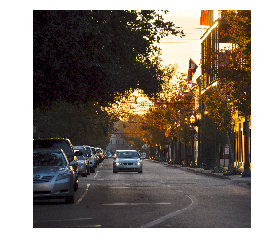

Image #1 - Predicted: [('n02869837', 'bonnet', 0.15160401), ('n02892767', 'brassiere', 0.071406059), ('n03124170', 'cowboy_hat', 0.065196954), ('n03485794', 'handkerchief', 0.036303025), ('n04597913', 'wooden_spoon', 0.035257205)]


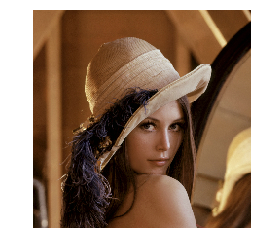

Image #2 - Predicted: [('n04509417', 'unicycle', 0.7670123), ('n03792782', 'mountain_bike', 0.08823657), ('n02835271', 'bicycle-built-for-two', 0.043272819), ('n04005630', 'prison', 0.019077893), ('n04517823', 'vacuum', 0.018232713)]


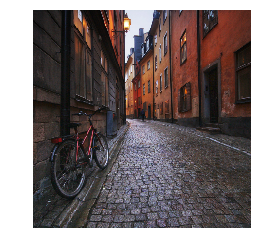

Image #3 - Predicted: [('n01807496', 'partridge', 0.31573707), ('n01797886', 'ruffed_grouse', 0.24950646), ('n01798484', 'prairie_chicken', 0.18175696), ('n01795545', 'black_grouse', 0.13443816), ('n01806567', 'quail', 0.030508325)]


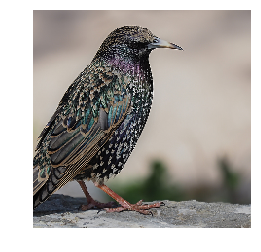

Image #4 - Predicted: [('n03063599', 'coffee_mug', 0.62016499), ('n04579145', 'whiskey_jug', 0.16358621), ('n07920052', 'espresso', 0.060607247), ('n07930864', 'cup', 0.055260945), ('n04560804', 'water_jug', 0.030859154)]


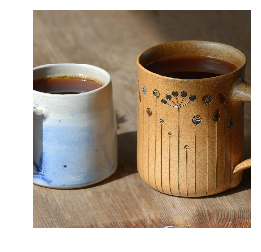

Image #5 - Predicted: [('n04418357', 'theater_curtain', 0.078027524), ('n06359193', 'web_site', 0.050994053), ('n03041632', 'cleaver', 0.039844483), ('n03291819', 'envelope', 0.031523924), ('n03838899', 'oboe', 0.025142929)]


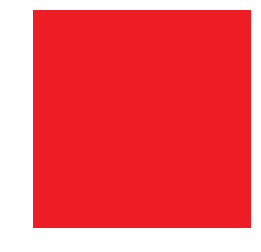

Image #6 - Predicted: [('n07745940', 'strawberry', 0.99942017), ('n07753592', 'banana', 0.00025229674), ('n04332243', 'strainer', 0.00010513713), ('n07749582', 'lemon', 7.9131009e-05), ('n07753275', 'pineapple', 5.5937038e-05)]


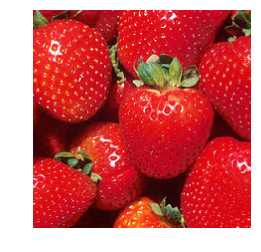

Image #7 - Predicted: [('n02930766', 'cab', 0.46595913), ('n03459775', 'grille', 0.067210667), ('n04285008', 'sports_car', 0.065157481), ('n03670208', 'limousine', 0.063298412), ('n04467665', 'trailer_truck', 0.053526077)]


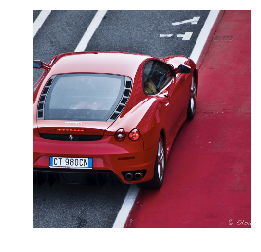

Image #8 - Predicted: [('n01534433', 'junco', 0.80774361), ('n01592084', 'chickadee', 0.056037035), ('n01601694', 'water_ouzel', 0.01645129), ('n01558993', 'robin', 0.014376548), ('n01582220', 'magpie', 0.013480875)]


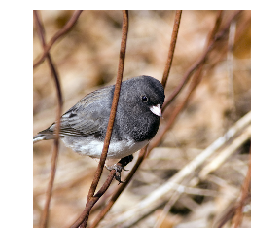

Image #9 - Predicted: [('n04335435', 'streetcar', 0.54683411), ('n04005630', 'prison', 0.17509334), ('n03877845', 'palace', 0.048925254), ('n04507155', 'umbrella', 0.024761101), ('n03781244', 'monastery', 0.023977779)]


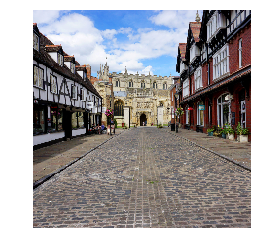

Image #10 - Predicted: [('n04418357', 'theater_curtain', 0.72352856), ('n07892512', 'red_wine', 0.027190084), ('n03388043', 'fountain', 0.026959252), ('n03976657', 'pole', 0.011780101), ('n04023962', 'punching_bag', 0.010375668)]


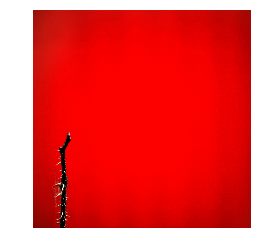

In [6]:
# results will be a list of tuples (class, description, probability)
for img_idx, c in enumerate(concepts):
    print("Image #{} - Predicted: {}".format(img_idx, c))
    image_fname = images[img_idx]
    img = imread("labs/data/" + image_fname)
    img = center_crop_image(img, size=224)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

## <a name="head25"></a> Image/Text Search in Tags BoW space

Now that we have classified each image with a set of concepts, let's implement a Tags BoW search space, based on the associated concepts.
The output of the model is a 1000-dimensions distribution. First, we need to clip the distribution by keeping only the k most probable concepts:

In [7]:
# Experiment with this parameter
k = 5

# Get the top K most probable concepts per image
sorted_concepts =  np.argsort(preds, axis=1)[:,::-1][:,:k]
print(sorted_concepts.shape)

(11, 5)


Assume that the vocabulary of the BoW space is the 1000 concepts. Thus, convert the top-k concepts indices to a BoW format:

In [8]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes=range(0,1000))
tags_bow = mlb.fit_transform(sorted_concepts)
print(tags_bow.shape)

(11, 1000)


# <a name="head3"></a> Text Named Entity Extraction

Now we will perform Named Entity Recognition. The goal is to identify in text documents, words/n-grams that refer to some entity. Examples of entities are:
* Persons
* Locations
* Organizations
* Dates / Time
* And many others...

To illustrate, consider the following document:

    "Donald Trump gave a speech at the White House"
    
There are two entities in this document: **the Person "Donald Trump" and the Location "White House"**. 

Searching over a BoW space in which only Named Entities are considered, allows the similarity between documents to be computed based only on highly **important**/**discriminative** words. As such, we will now see how to automatically perform Named Entity Recognition.

## <a name="head31"></a> Corpus
We will use the brown corpus from NLTK. 

In [9]:
import nltk
from nltk.corpus import brown
nltk.download('brown')
corpus = brown.sents()

corpus = [" ".join(sent) for sent in corpus]
print("Total texts: {}".format(len(corpus)))

[nltk_data] Downloading package brown to /home/david/nltk_data...
[nltk_data]   Package brown is already up-to-date!
Total texts: 57340


In [10]:
# Let's take a sample set of documents. Feel free to experiment with other documents
corpus_sample_idx = [4, 1340, 7845, 9145, 20112] 

## <a name="head32"></a>  Named-Entities Extraction

The NLTK library will be used to perform NER. Namely, we will use a pre-trained model on the ACE corpus.  The model that we will use supports the following types of Entities: 

FACILITY, GPE, GSP, LOCATION, ORGANIZATION, PERSON.

Check page 4 of the following pdf for a description of each type: https://www.ldc.upenn.edu/sites/www.ldc.upenn.edu/files/english-entities-guidelines-v6.6.pdf.

In [11]:
from nltk import ne_chunk, pos_tag, word_tokenize

# Perform NER on the input sentence.
# First the sentence is tokenized, then parts-of-speech are identified, and then we call the NER function ne_chunk.
def extract_named_entities(sentence):
    ners = []
    for sent in nltk.sent_tokenize(sentence):
        for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
            if hasattr(chunk, 'label'):
                ners.append((chunk.label(), ' '.join(c[0] for c in chunk)))
    return ners

In [12]:
# chunker=nltk.data.load(nltk.chunk._MULTICLASS_NE_CHUNKER) 
# print(sorted(chunker._tagger._classifier.labels()))
# #The prefix "B-" appended to the NE type indicates that the token constitutes the beginning of an NE, whereas any other token after the first is given the prefix "I-".

# Show the results for the sample set
[(idx, extract_named_entities(corpus[idx])) for idx in corpus_sample_idx]

[(4, [('GPE', 'Georgia')]),
 (1340,
  [('PERSON', 'Skorich'),
   ('PERSON', 'Norm Van Brocklin'),
   ('ORGANIZATION', 'Minnesota Vikings'),
   ('ORGANIZATION', 'National Football League')]),
 (7845, [('ORGANIZATION', 'National Film Board'), ('GPE', 'Canada')]),
 (9145, [('LOCATION', 'Southwest')]),
 (20112, [('ORGANIZATION', 'Quakers'), ('GPE', 'South')])]

# <a name="head4"></a> Image High-level semantic embeddings

In the first part of this lab we categorized images within a set of 1000 concepts, using a ResNet-50 CNN.

In order to obtain high-level semantic representations for images, we will also extract such representations from a **Convolutional Neural Network (CNN)**, trained for the task of **image concept classification**.

**Convolutional Neural Networks are able to automatically learn representations of images, that maximize performance on a given task. Thus, these representations are bound to the task that they are being applied.** For instance, for the task of image concept classification, the network will try to learn representations that discriminate images within the total set of (1000) concepts.  This is a key feature of these networks.

If we take a ResNet CNN and pre-train it on the ImageNet task, the network will be able to produce image features that represent/discriminate images according to the concepts that are present in each image. 

Given the high-performance of the ResNet (it even outperform humans in this task*), we can assume that the feature space is well structured and images are represented in terms of their meaning. For instance, it is expected that images of cats will be closer (distance in the embedding space) to dogs images, than to buildings.

*https://www.forbes.com/sites/michaelthomsen/2015/02/19/microsofts-deep-learning-project-outperforms-humans-in-image-recognition/#4f486ebe740b

We will use the same ResNet-50 model to extract image representations. To do this, **we will extract the neuron activations of an intermediate layer of the CNN**.
As the network was trained for image classification, within a set of 1000 concepts, we expect that the extracted embeddings will encode concepts present in the image.

In [13]:
# Load the ResNet-50 model and load the pre-trained weights.
# Now, unlike for image categorization, we will extract features from the penultimate layer of the CNN.
model = ResNet50(weights='imagenet', include_top=False, pooling="avg")

In [14]:
# Feed all images to the model and  
preds = model.predict(img_array_list)
print("Resulting shape of the network output: {}".format(preds.shape))

Resulting shape of the network output: (11, 2048)


# <a name="head5"></a> Exercises

In [15]:
# 1 - Image Categorization: 
# - Inspect the images and the predicted concepts.
# - Were all predictions correct? If not, why did the network fail?
# - What is the problem with images with multiple visible objects? What could you do to improve performance?


In [16]:
# 2 - Search in BoW Tags Space: 
# - Implement Tags BoW search on this space.
# - Experiment with multiple images and discuss this method
# - Try multiple values for k. What is the impact of k in the results that you observe?


In [17]:
# 3 - Text Search in Named entities BoW Space:
# - Take the output of the extract_named_entities function and represent documents in an Entities BoW vector space. 
# - Implement text search on this space.
# - Compare this text space with the BoW space covered in the last lab. Discuss the obtained results.


In [18]:
# 4 - Image Search using High-level embedding spaces:
# - Implement search using high-level semantic embeddings extracted from the CNN network.
# HINT: All the search part is already implemented in previous examples. The only thing that is different are the feature vectors.


In [19]:
# 5 - Compare the Concepts BoW search space vs. High-level Embeddings. 
# - What do you observe? 
# - Name advantages and disadvantages of each space.


In [20]:
# 6 - Out-of-vocabulary problem: The CNN model that we used was trained to detect 1000 concepts. 
# - What happens when we extract visual semantic features, from a CNN trained on 1000 concepts, from an image with a concept that is not in the original 1000 concepts?
# Hint: Experiment with several images to get a better insight.
#      You can find a list of the 1000 ImageNet concepts here: https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a


In [21]:
# 7 - Robustness of the CNN model:
# - How does image rotation and scale affects concept detection?


In [22]:
# 8 - Image Spaces from Intermediate layers
# - Extract features from a layer closer to the input of the network. Compare the search results of the high-level embeddings we extracted above with the space of the layer you've choosed.

# Hint: In keras, you can specify which layer should be the output as follows:
#model = ResNet50(weights='imagenet')
#model = Model(inputs=base_model.input, outputs=base_model.get_layer('<layer_name>').output)

# To find layer names inspect the original paper and the source code of the ResNet-50 model.
# He, Kaiming, Xiangyu Zhang, Shaoqing Ren and Jian Sun. “Deep Residual Learning for Image Recognition.” 
#             2016 IEEE Conference on Computer Vision and Pattern Recognition (CVPR) (2016), https://arxiv.org/abs/1512.03385)
